## Credentials

github: gozelalmazovna

You can change the code however you want, have fun!

### Import libraries

In [1]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import color,exposure
from skimage.transform import rescale, resize,downscale_local_mean
from pylab import *
from PIL import Image as im
from PIL import ImageOps

### Q1. Take 10 images with a camera (camera and objects should be fixed) and display their average.


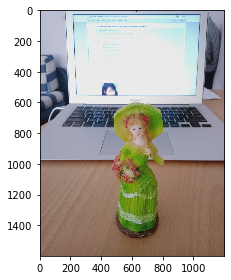

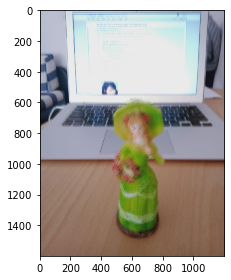

In [2]:
#Open and save all 10 images in a list
img_list = []
for i in range(1, 11):
    img_list.append(im.open('%d.jpeg' %i))
#Convert to numpy array and average the result
img_np = np.array([np.array(k) for k in img_list])
img_avg = np.average(img_np,axis=0)
#Convert array to an image and save
img_avgp = im.fromarray(img_avg.astype('uint8')) 
img_avgp.save('img_avg_photo.jpeg')
#Original first image
figure(0)
io.imshow(io.imread('1.jpeg'))
#Averaged image
figure(1)
io.imshow(io.imread('img_avg_photo.jpeg'))

### Q3. Write your own code for image negative and display the results.
Image negative is a very strange image to say the least.

In [2]:
def negative_img(img_str):
    """
    Function calculates negatives of the image.
    It creates 2 new versions of original photo: Grayscale and Negative
    
    Input: string having name of the file Ex: "shinminah.jpg"
    
    """
    new_img = im.open(img_str)
    #Convert to grayscale
    my_img = ImageOps.grayscale(new_img)
    #Save grascale version 
    my_img.save("grey_"+img_str)
    for h in range(my_img.size[0]):
        for w in range(my_img.size[1]):
            pix_val = my_img.getpixel((h,w))
            #Compute s=L-1-r
            #Pixel values are from 0 to 255 and then L-1=254
            new_pix_val = 254 - pix_val
            my_img.putpixel((h,w),new_pix_val)
    #Save negative
    my_img.save("negative_"+img_str)
    figure(0)
    #Original photo
    io.imshow(io.imread(img_str))
    figure(1)
    #Grayscale photo
    io.imshow(io.imread("grey_"+img_str))
    figure(2)
    #Negative photo
    io.imshow(io.imread("negative_"+img_str))

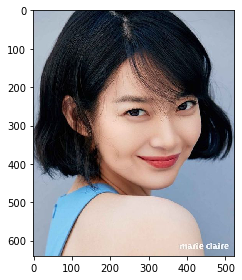

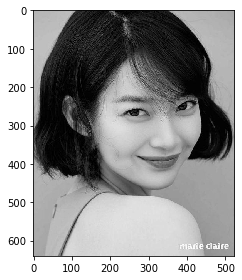

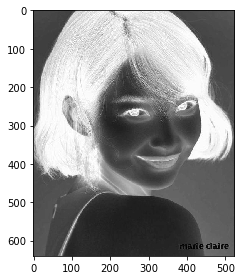

In [3]:
negative_img("shinminah.jpg")

### Q4.Write your own code for Gamma correction and display the results.


In [4]:
def gamma_img(img_str):
    """
    Function creates gamma correction of the image.
    It creates 2 new versions of original photo: Grayscale and Gamma
    
    Input: string having name of the file Ex: "shinminah.jpg"
    
    Gamma correction s=c*r**γ where c = 1 and γ=1.3
    
    """
    new_img = im.open(img_str)
    #Convert to grayscale
    my_img = ImageOps.grayscale(new_img)
    #Save grascale version 
    my_img.save("grey_"+img_str)
    for h in range(my_img.size[0]):
        for w in range(my_img.size[1]):
            pix_val = my_img.getpixel((h,w))
            #Compute s=c*r**γ
            new_pix_val = int(pix_val**1.3)
            my_img.putpixel((h,w),new_pix_val)
    #Save gamma
    my_img.save("gamma_"+img_str)
    figure(0)
    #Original photo
    io.imshow(io.imread(img_str))
    figure(1)
    #Grayscale photo
    io.imshow(io.imread("grey_"+img_str))
    figure(2)
    #Gamma photo
    io.imshow(io.imread("gamma_"+img_str))

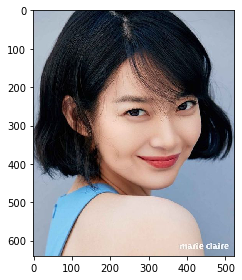

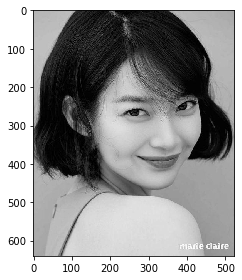

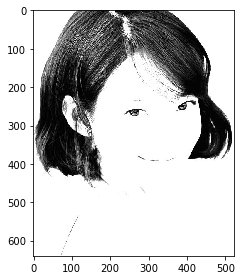

In [5]:
gamma_img("shinminah.jpg")

### Q5.	Use the Scikit-image library and implement the Gamma correction. Compare your results to Step 3.

In [6]:
def gamma_img_lib(img_str):
    """
    Function creates gamma correction of the image using Skimage lib.
    It creates new version of original photo: Gamma
    
    Input: string having name of the file Ex: "shinminah.jpg"
    
    Gamma correction where γ=0.5
    
    """
    my_img = io.imread(img_str)
    #Gamma correction using adjust_gamma
    gamma_exp = exposure.adjust_gamma(my_img, 0.5)
    figure(0)
    #Greyscale photo
    io.imshow(my_img)
    figure(1)
    #Gamma photo
    io.imshow(gamma_exp)


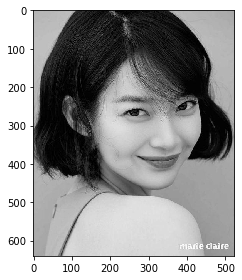

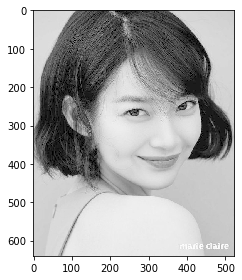

In [7]:
gamma_img_lib("grey_shinminah.jpg")

### Q6. Implement log transform and comment on the effect of the parameters.

Performing log correction took away portion of the photo. Photo is now currupted.

In [8]:
def log_img_lib(img_str):
    """
    Function creates gamma correction of the image using Skimage lib.
    It creates new version of original photo: Log
    
    Input: string having name of the file Ex: "shinminah.jpg"
    
    Log correction where 2
    
    """
    my_img = io.imread(img_str)
    #Log correction using adjust_log
    log_corrected = exposure.adjust_log(my_img, 2) 
    figure(0)
    #Greyscale photo
    io.imshow(my_img)
    figure(1)
    #Log photo
    io.imshow(log_corrected)

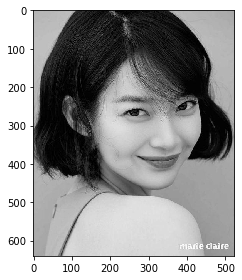

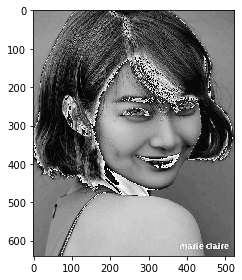

In [9]:
log_img_lib("grey_shinminah.jpg")

### Q7. Downscale an image by 2, then upscale it by 4. Show the results and comment on your findings. 

Rescaling image by 0.1 pixelized the resoltion of the image.

Downscailing by 2 and then upscaling by 4 destroyed original image.

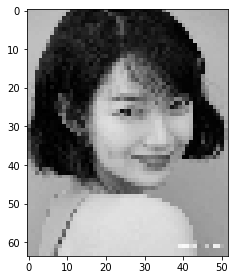

In [10]:
#Rescaled image
image = io.imread("grey_shinminah.jpg")
image_rescaled = rescale(image, 0.1, anti_aliasing=False)
io.imshow(image_rescaled)

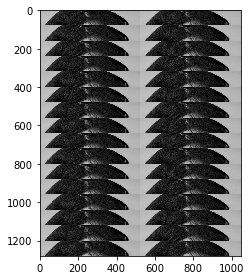

In [11]:
#Image downscaled by two and upscaled by 4
image_resized = resize(image, (image.shape[0] // 2, image.shape[1] // 2))
image_resized = resize(image_resized, (image_resized.shape[0] * 4, image_resized.shape[1] * 4))
io.imshow(image_resized)

C:\Users\Sony\anaconda3\envs\myenv\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


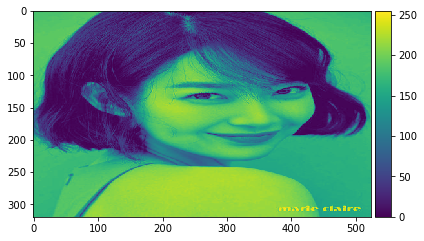

In [12]:
#Downscale_local_mean is used
image_downscaled = downscale_local_mean(image, (2,1))
io.imshow(image_downscaled)